In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

bias = 10
# Let's use the `make_regression` function to generate regression data.
# - n_samples: Number of data samples.
# - n_features: Number of features in the data (one feature).
# - n_targets: Number of targets (one target).
# - noise: Level of noise in the data.
# - bias: Bias or intercept in the regression.
# - coef: Specifies whether to return regression coefficients.
# - random_state: Sets the seed for the random number generator for result reproducibility.
X_numpy, y_numpy, coef = make_regression(
    n_samples=5000,
    n_features=1,
    n_targets=1,
    noise=10,
    bias=bias,
    coef=True,
    random_state=303
)

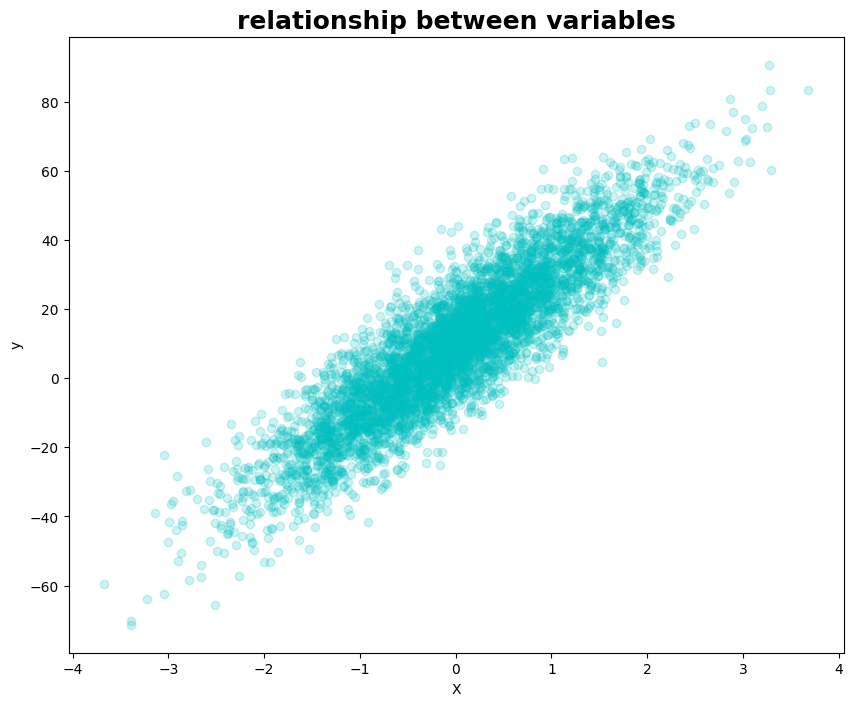

In [2]:

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_numpy, y_numpy, c='c', marker='o', alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('relationship between variables', size=18, weight='bold')

plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

#  define a class RegressionDataset that inherits from the Dataset class in PyTorch
class RegressionDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()

        # convert the data X and y into PyTorch tensors of type float32
        self.X = torch.from_numpy(X.astype('float32'))
        self.y = torch.from_numpy(y.astype('float32'))

    def __len__(self):
        # returns the number of samples in the dataset
        return len(self.X)

    def __getitem__(self, index):
        # returns a single sample from the dataset as a tuple (feature, label)
        return self.X[index], self.y[index].unsqueeze(0)

# create an instance of the RegressionDataset class, passing the data X_numpy and y_numpy
dataset = RegressionDataset(X_numpy, y_numpy)

In [4]:
train_dataset, test_dataset = random_split(dataset, lengths=[0.8, 0.2])

# DataLoader for training data
train_loader = DataLoader(
    dataset=train_dataset,  # training data
    batch_size=64,  # define batch size
    shuffle=True  # for ech epoch shuffle data
)

# Same for test data
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=True
)

In [6]:
# define LinearRegressionSimple class, which inherits from nn.Module z PyTorch.
class LinearRegressionSimple(nn.Module):
    def __init__(self, in_features=1, out_features=1):
        super().__init__()

        # linear layer
        self.linear = nn.Linear(
            in_features=in_features,
            out_features=out_features
        )

    def forward(self, x):
        # model's forward pass, transforms the input data through a linear layer
        return self.linear(x)

In [7]:
model = LinearRegressionSimple()

In [8]:
# define Mean Squared Error
criterion = nn.MSELoss()
# optimizer Stochastic Gradient Descent (SGD).
# optimizer's parameters (model.parameters()) and learning rate (lr=0.001).
optimizer = optim.SGD(params=model.parameters(), lr=0.001)

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
device

'cuda'

In [11]:
train_losses = []
val_losses = []

In [12]:
# define train function
def train(model, train_loader, criterion, optimizer, epoch, num_epochs):
    model.train()
    train_loss = 0.0

    # iterate through the training data using a DataLoader
    for inputs, targets in train_loader:
        # if GPU is available define workload
        inputs = inputs.to(device)
        targets = targets.to(device)

        # pass the data through the model
        outputs = model(inputs)

        # calculate the loss between predictions and actual targets
        loss = criterion(outputs, targets)

        # gradient reset
        optimizer.zero_grad()

        # acumulate loss
        train_loss += loss.item()

        # backpropagation
        loss.backward()

        # update the model weights based on the gradients
        optimizer.step()

    # average loss taking into consideration all batches in epochs
    avg_loss = train_loss / len(train_loader)

    # training progress information
    print(f'Epoch [{epoch + 1:03}/{num_epochs:03}] | Train Loss: {avg_loss:.4f}')

    # average loss to a list for later visualization
    train_losses.append(avg_loss)

In [13]:
# define validate function, which is responsible for model validation
def validate(model, val_loader, criterion, device):
    # evaluation mode, without learning
    model.eval()
    val_loss = 0.0

    # turning off gradients
    with torch.no_grad():
        for inputs, targets in val_loader:
            # if GPU is available
            inputs = inputs.to(device)
            targets = targets.to(device)

            # passing data
            outputs = model(inputs)

            # loss
            loss = criterion(outputs, targets)

            # loss acumulation
            val_loss += loss.item()

    avg_loss = val_loss / len(val_loader)

    print(f'Validation Loss: {avg_loss:.4f}')

    val_losses.append(avg_loss)

In [14]:
# training process
num_epochs = 30 # >30 its near to still
model.to(device)
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer, epoch, num_epochs)
    validate(model, test_loader, criterion, device)

Epoch [001/030] | Train Loss: 532.2698
Validation Loss: 477.2038
Epoch [002/030] | Train Loss: 438.5485
Validation Loss: 390.8777
Epoch [003/030] | Train Loss: 363.0603
Validation Loss: 329.5220
Epoch [004/030] | Train Loss: 304.7552
Validation Loss: 275.1315
Epoch [005/030] | Train Loss: 260.4149
Validation Loss: 234.4630
Epoch [006/030] | Train Loss: 224.2875
Validation Loss: 203.0381
Epoch [007/030] | Train Loss: 196.2850
Validation Loss: 178.6843
Epoch [008/030] | Train Loss: 174.9389
Validation Loss: 158.9982
Epoch [009/030] | Train Loss: 158.0272
Validation Loss: 143.6782
Epoch [010/030] | Train Loss: 144.6782
Validation Loss: 133.5525
Epoch [011/030] | Train Loss: 134.7365
Validation Loss: 123.8744
Epoch [012/030] | Train Loss: 126.7094
Validation Loss: 116.9842
Epoch [013/030] | Train Loss: 120.5402
Validation Loss: 111.1602
Epoch [014/030] | Train Loss: 115.8701
Validation Loss: 106.8331
Epoch [015/030] | Train Loss: 112.2508
Validation Loss: 103.4607
Epoch [016/030] | Train L

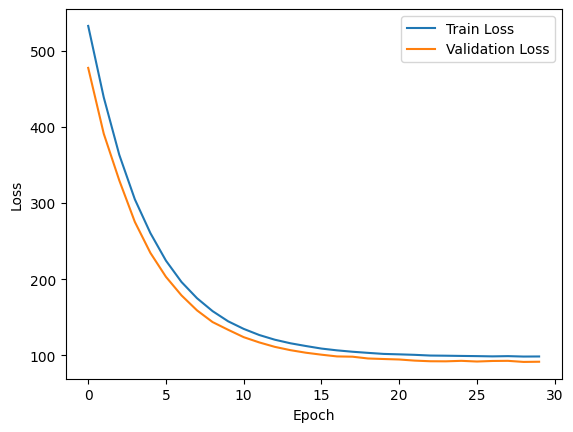

In [15]:
# plotting 
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
# model parameters
print(f'{model.linear.bias=}')
print(f'{model.linear.weight=}')

model.linear.bias=Parameter containing:
tensor([9.8559], device='cuda:0', requires_grad=True)
model.linear.weight=Parameter containing:
tensor([[19.1573]], device='cuda:0', requires_grad=True)


## Task 1: Implementation of an Equivalent Model in sklearn
- Implement a linear regression model using LinearRegression from sklearn.linear_model and compare its results with the PyTorch model.
- Conduct training and validation of the model.
- Compare performance metrics such as MSE and R^2 for both models.
### Tips:
- Use the fit method on the LinearRegression object to conduct training.
- The score method of the LinearRegression object returns the coefficient of determination R^2.
- You can use mean_squared_error from sklearn.metrics to calculate MSE.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# regression model from sklearn
sklearn_model = LinearRegression()
X_train = train_dataset.dataset.X.numpy()
y_train = train_dataset.dataset.y.numpy()
sklearn_model.fit(X_train, y_train)

# predict
X_test = test_dataset.dataset.X.numpy()
y_test = test_dataset.dataset.y.numpy()
y_pred_sklearn = sklearn_model.predict(X_test)

# efficiency metrics
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f'Metrics for LinearRegression model in sklearn:')
print(f'MSE: {mse_sklearn}')
print(f'R^2: {r2_sklearn}')

Metrics for LinearRegression model in sklearn:
MSE: 96.8249740600586
R^2: 0.7980628932922569


## Task 2: Experiments with Different Levels of Noise
### Goal:
Investigate how different levels of noise affect the performance of both models.

### Steps:
- Modify the level of noise in the data generated by make_regression and create several datasets (e.g., noise=5, 10, 20).
- For each dataset, train both models and evaluate their performance.
- Create a plot showing how noise affects MSE and R^2 in both models.
### Tips:
- Use a loop to systematically generate data and conduct experiments.
- Make sure to use the same random_state value in each experiment to ensure comparable results.


In [18]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the PyTorch model
class LinearRegressionSimple(nn.Module):
    def __init__(self, in_features=1, out_features=1):
        super().__init__()
        self.linear = nn.Linear(in_features=in_features, out_features=out_features)

    def forward(self, x):
        return self.linear(x)

# Define the dataset class
class RegressionDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.from_numpy(X.astype('float32'))
        self.y = torch.from_numpy(y.astype('float32'))

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index].unsqueeze(0)

# Define the training function for the PyTorch model
def train(model, train_loader, criterion, optimizer, epoch, num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, targets)

        optimizer.zero_grad()

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    avg_loss = train_loss / len(train_loader)

    print(f'Epoch [{epoch + 1:03}/{num_epochs:03}] | Train Loss: {avg_loss:.4f}')

    train_losses.append(avg_loss)

# Define the validation function for the PyTorch model
def validate(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)

            loss = criterion(outputs, targets)

            val_loss += loss.item()

    avg_loss = val_loss / len(val_loader)

    print(f'Validation Loss: {avg_loss:.4f}')

    val_losses.append(avg_loss)

# Set the random seed for reproducibility
np.random.seed(303)

# Define the noise levels to use
noises = [5, 10, 20]

# Define the number of samples to generate
n_samples = 5000

# Define the number of features and targets
n_features = 1
n_targets = 1

# Define the bias term
bias = 10

# Define the number of epochs to train for
num_epochs = 30

# Define the batch size for training
batch_size = 64

# Define the learning rate for the optimizer
lr = 0.001

# Define the device to use for training (GPU if available, otherwise CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the lists to store the MSE and R^2 scores for both models
pytorch_mses = []
pytorch_r2s = []
sklearn_mses = []
sklearn_r2s = []

# Loop over the different noise levels
for noise in noises:
    # Generate the dataset with the current noise level
    X_numpy, y_numpy, coef = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_targets=n_targets,
        noise=noise,
        bias=bias,
        coef=True,
        random_state=33
    )

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

    # Create the PyTorch dataset and dataloaders
    dataset = RegressionDataset(X_train, y_train)
    train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=RegressionDataset(X_test, y_test), batch_size=batch_size, shuffle=True)

    # Create the PyTorch model, criterion, and optimizer
    model = LinearRegressionSimple()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)

    # Move the model and data to the device
    model.to(device)
    X_test_tensor = torch.from_numpy(X_test.astype('float32')).to(device)
    y_test_tensor = torch.from_numpy(y_test.astype('float32')).to(device)

    # Train the PyTorch model
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        train(model, train_loader, criterion, optimizer, epoch, num_epochs)
        validate(model, val_loader, criterion, device)

    # Evaluate the PyTorch model on the testing data
    y_pred_pytorch = model(X_test_tensor).detach().cpu().numpy()
    pytorch_mse = mean_squared_error(y_test, y_pred_pytorch)
    pytorch_r2 = r2_score(y_test, y_pred_pytorch)
    pytorch_mses.append(pytorch_mse)
    pytorch_r2s.append(pytorch_r2)

    # Create the scikit-learn model and train it on the training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Evaluate the scikit-learn model on the testing data
    y_pred_sklearn = lr_model.predict(X_test)
    sklearn_mse = mean_squared_error(y_test, y_pred_sklearn)
    sklearn_r2 = r2_score(y_test, y_pred_sklearn)
    sklearn_mses.append(sklearn_mse)
    sklearn_r2s.append(sklearn_r2)

Epoch [001/030] | Train Loss: 2819.8566
Validation Loss: 2315.0877
Epoch [002/030] | Train Loss: 2181.2774
Validation Loss: 1768.3682
Epoch [003/030] | Train Loss: 1685.8651
Validation Loss: 1393.8388
Epoch [004/030] | Train Loss: 1307.3809
Validation Loss: 1072.9965
Epoch [005/030] | Train Loss: 1018.2066
Validation Loss: 822.1526
Epoch [006/030] | Train Loss: 790.8811
Validation Loss: 644.4462
Epoch [007/030] | Train Loss: 617.5026
Validation Loss: 505.5390
Epoch [008/030] | Train Loss: 482.5036
Validation Loss: 398.9674
Epoch [009/030] | Train Loss: 378.4721
Validation Loss: 311.0383
Epoch [010/030] | Train Loss: 298.0740
Validation Loss: 244.4604
Epoch [011/030] | Train Loss: 235.8128
Validation Loss: 194.0422
Epoch [012/030] | Train Loss: 188.9158
Validation Loss: 153.2374
Epoch [013/030] | Train Loss: 150.8745
Validation Loss: 123.3305
Epoch [014/030] | Train Loss: 122.1938
Validation Loss: 101.5817
Epoch [015/030] | Train Loss: 99.7609
Validation Loss: 83.5953
Epoch [016/030] | 

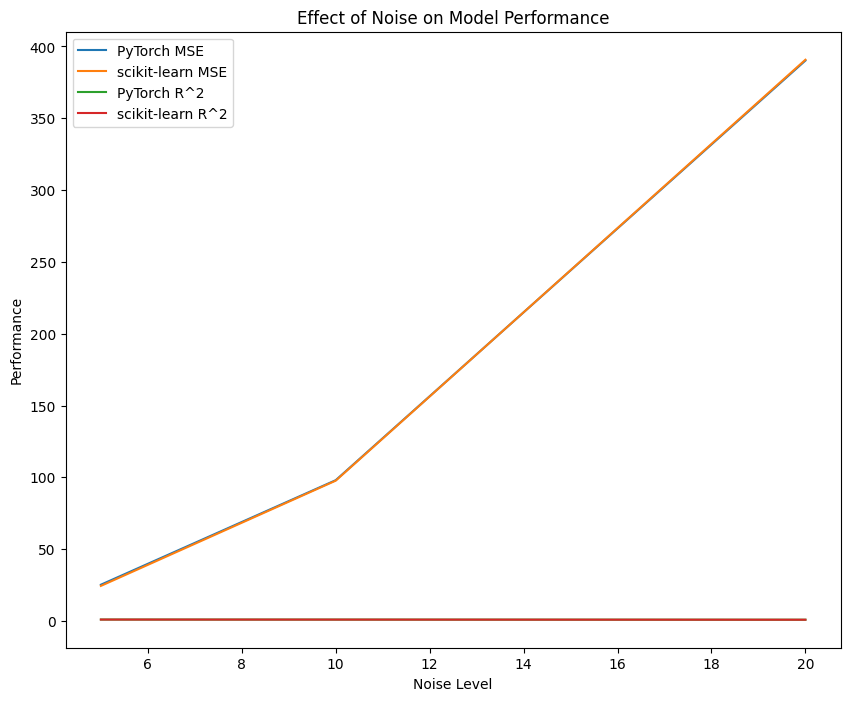

In [19]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(noises, pytorch_mses, label='PyTorch MSE')
ax.plot(noises, sklearn_mses, label='scikit-learn MSE')
ax.plot(noises, pytorch_r2s, label='PyTorch R^2')
ax.plot(noises, sklearn_r2s, label='scikit-learn R^2')
ax.set_xlabel('Noise Level')
ax.set_ylabel('Performance')
ax.set_title('Effect of Noise on Model Performance')
ax.legend()
plt.show()

## Task 3: Analysis of the Impact of Training Set Size
### Goal:
Analyze the impact of the training set size on the performance of both linear regression models.
### Steps:
- Create different splits of the data into training and test sets, varying the proportions (e.g., 0.5, 0.7, 0.9 for the training set).
- For each split, train both models and calculate their MSE and R^2 on the test set.
- Create plots illustrating how the performance of the models changes with the size of the training set.
### Tips:
- You can modify the lengths parameter in the random_split function to split the dataset.
- Remember to train both models again for each split of the dataset - do not reuse models trained on different data splits.
- Utilize mean_squared_error and r2_score from sklearn.metrics to compute MSE and R^2.
- For the plots, you can use matplotlib or seaborn to visualize the results.







In [20]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# random seed for reproducibility
random_state = 303

#training set sizes
test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
# num of samples
n_samples = 5000
# num of features and targets
n_features = 1
n_targets = 1
bias = 10

# lists to store the MSE and R^2 scores for both models
pytorch_mses = []
pytorch_r2s = []
sklearn_mses = []
sklearn_r2s = []

# Looping over list of training set sizes
for test_size in test_sizes:
    # generate the dataset
    X, y, coef = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_targets=n_targets,
        noise=10,
        bias=bias,
        coef=True,
        random_state=random_state
    )

    # split the dataset
    n_train = int(test_size * n_samples)
    X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

    # PyTorch model and criterion
    model = LinearRegression()
    criterion = mean_squared_error

    # train the PyTorch model
    model.fit(X_train, y_train)

    # evaluation of the given model
    y_pred_pytorch = model.predict(X_test)
    pytorch_mse = mean_squared_error(y_test, y_pred_pytorch)
    pytorch_r2 = r2_score(y_test, y_pred_pytorch)
    pytorch_mses.append(pytorch_mse)
    pytorch_r2s.append(pytorch_r2)

    # do the same for scikit-learn
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # scikit-learn model evaluation
    y_pred_sklearn = lr_model.predict(X_test)
    sklearn_mse = mean_squared_error(y_test, y_pred_sklearn)
    sklearn_r2 = r2_score(y_test, y_pred_sklearn)
    sklearn_mses.append(sklearn_mse)
    sklearn_r2s.append(sklearn_r2)

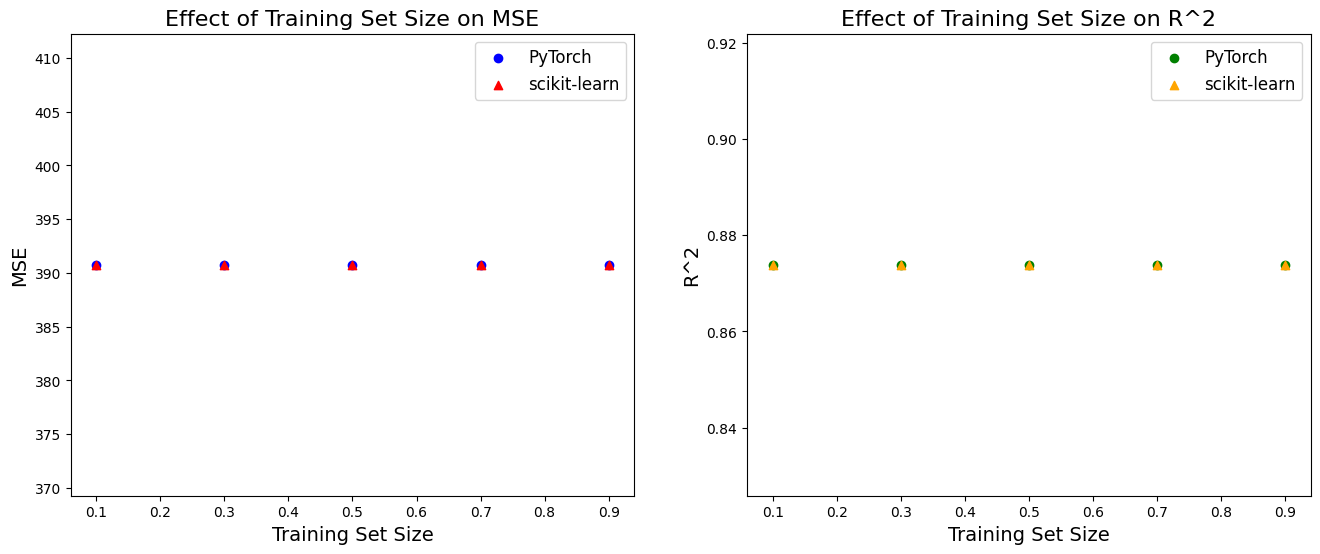

In [21]:
# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the MSE scores
ax1.scatter(test_sizes, pytorch_mses, label='PyTorch', color='blue')
ax1.scatter(test_sizes, sklearn_mses, label='scikit-learn', color='red', marker='^')
ax1.set_xlabel('Training Set Size', fontsize=14)
ax1.set_ylabel('MSE', fontsize=14)
ax1.set_title('Effect of Training Set Size on MSE', fontsize=16)
ax1.legend(fontsize=12)

# Plot the R^2 scores
ax2.scatter(test_sizes, pytorch_r2s, label='PyTorch', color='green')
ax2.scatter(test_sizes, sklearn_r2s, label='scikit-learn', color='orange', marker='^')
ax2.set_xlabel('Training Set Size', fontsize=14)
ax2.set_ylabel('R^2', fontsize=14)
ax2.set_title('Effect of Training Set Size on R^2', fontsize=16)
ax2.legend(fontsize=12)

plt.show()